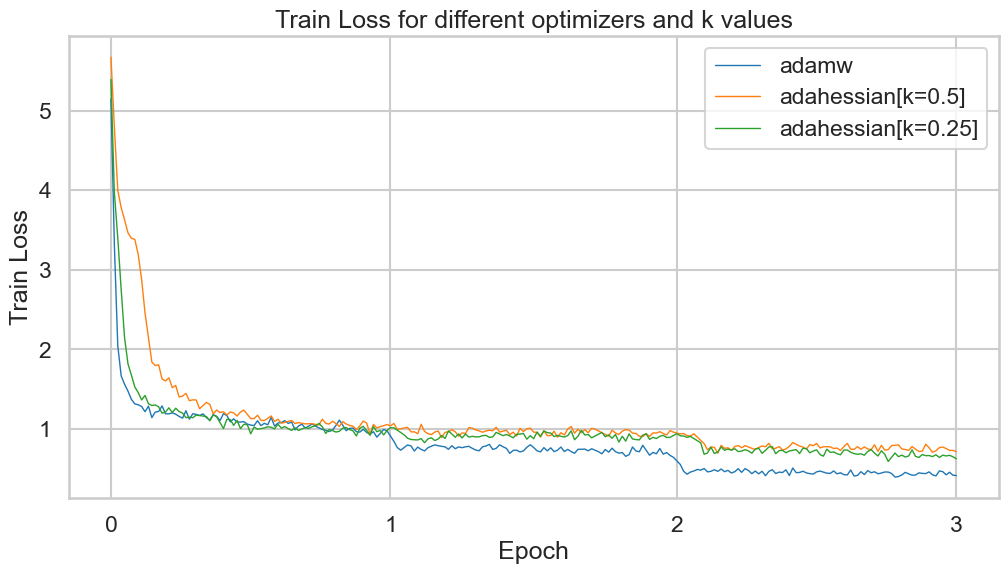

In [122]:
import pandas as pd


df_1 = pd.read_csv('/Users/silviaromanato/Desktop/good runs.csv')
df_1 = df_1[df_1.columns[pd.Series(df_1.columns).str.contains('train_loss$')]]
df_1.rename(columns={'[FULL k=0.5 continued part 2] adahessian-lr0.002661-bs16-epochs3 - train_loss': 'k=0.5, part2',
                     '[FULL k=0.25] adahessian-lr0.003-bs16-epochs3 - train_loss': 'k=0.25', 
                     '[FULL k=0.5 interrupted part 1] adahessian-lr0.003-bs16-epochs3 - train_loss': 'k=0.5, part1',
                     '[FULL] adamw-lr5e-05-bs16-epochs3 - train_loss': 'adamw'}, inplace=True)

adamw = df_1['adamw'][:-8].interpolate()
k05p2 = df_1['k=0.5, part2'][:-51].interpolate()
k05p1 = df_1['k=0.5, part1'][:52].interpolate()
k05 = pd.concat([k05p1, k05p2]).reset_index(drop=True)
k05[51:62] = [1.085373, 1.097032, 1.108691, 1.070350, 1.082009, 1.073668, 1.065327, 1.066986, 1.068645, 1.059304, 1.051963]
k025 = df_1['k=0.25'].interpolate()

df = pd.concat([adamw, k05, k025], axis=1, keys=['adamw', 'adahessian[k=0.5]', 'adahessian[k=0.25]'])[:-9]

# make a nice plot
import matplotlib.pyplot as plt
import seaborn as sns


df['epoch'] = df.index / 82

sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 6))
plt.plot(df['adamw'], label='adamw', linewidth=1) 
plt.plot(df['adahessian[k=0.5]'], label='adahessian[k=0.5]', linewidth=1)
plt.plot(df['adahessian[k=0.25]'], label='adahessian[k=0.25]', linewidth=1)
plt.legend()
plt.xlabel('Epoch')
plt.xticks([0, 82, 166, 248], ['0', '1', '2', '3'])
plt.ylabel('Train Loss')
plt.title('Train Loss for different optimizers and k values')
plt.show()


# Memory allocated

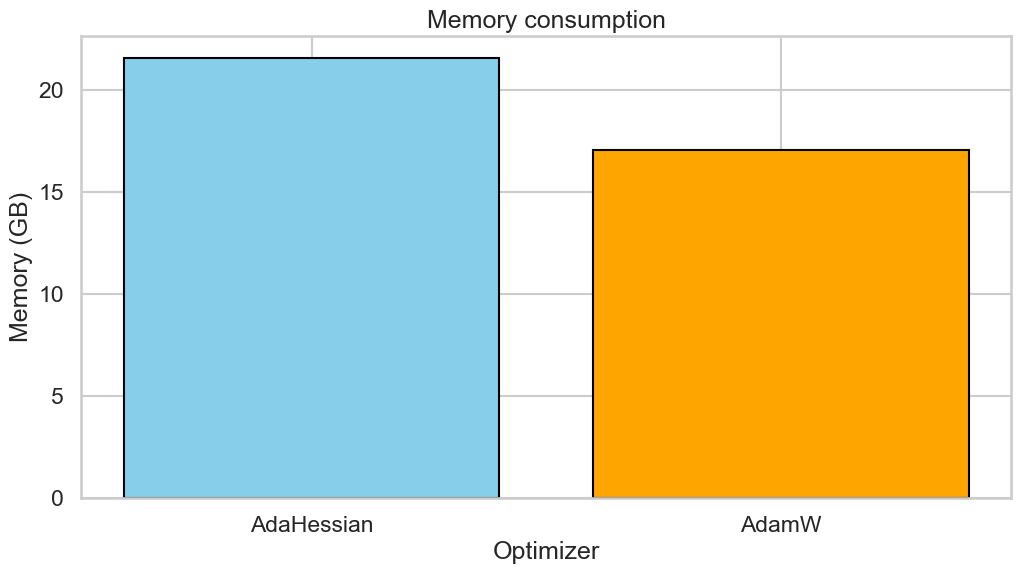

In [135]:
memory = [23145086976, 18294374400]
memory = [x / 1024 / 1024 / 1024 for x in memory]
df = pd.DataFrame(memory, columns=['Memory'], index=['AdaHessian', 'AdamW'])


# make a nice plot
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Memory'], color=['skyblue', 'orange'])
plt.xlabel('Optimizer')
plt.ylabel('Memory (GB)')
plt.title('Memory consumption')
plt.show()